# Import statements

In [54]:
import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

import plotly.offline as pyo

%matplotlib inline
pyo.init_notebook_mode(connected = True)

# Section  1:

# Data import on COVID19 

In [3]:
df_covid19=pd.read_csv('WHO-COVID-19-global-data.csv')
df_covid19.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [4]:
df_covid19=df_covid19[['Date_reported','Country','New_cases',]]

## Filter world data for getting only India specific values

In [5]:
df_covid19_ind=df_covid19[df_covid19.Country=='India']
df_covid19_ind.head()

,Date_reported,Country,New_cases
88800,2020-01-03,India,0
88801,2020-01-04,India,0
88802,2020-01-05,India,0
88803,2020-01-06,India,0
88804,2020-01-07,India,0


## Check for NAN cells 

In [6]:
df_covid19_ind.isna().values.any()

False

## Converting daily data to monthly data

In [7]:
df_covid19_ind['Date_reported']=pd.to_datetime(df_covid19_ind['Date_reported'])
df_covid19_ind_monthly=df_covid19_ind.resample('M',on='Date_reported').last()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12676\2995685530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_covid19_ind['Date_reported']=pd.to_datetime(df_covid19_ind['Date_reported'])


In [8]:
df_covid19_ind_monthly.head()

,Date_reported,Country,New_cases
Date_reported,,,
2020-01-31,2020-01-31,India,4
2020-02-29,2020-02-29,India,0
2020-03-31,2020-03-31,India,180
2020-04-30,2020-04-30,India,1718
2020-05-31,2020-05-31,India,8380


## Plotting COVID19 line chart

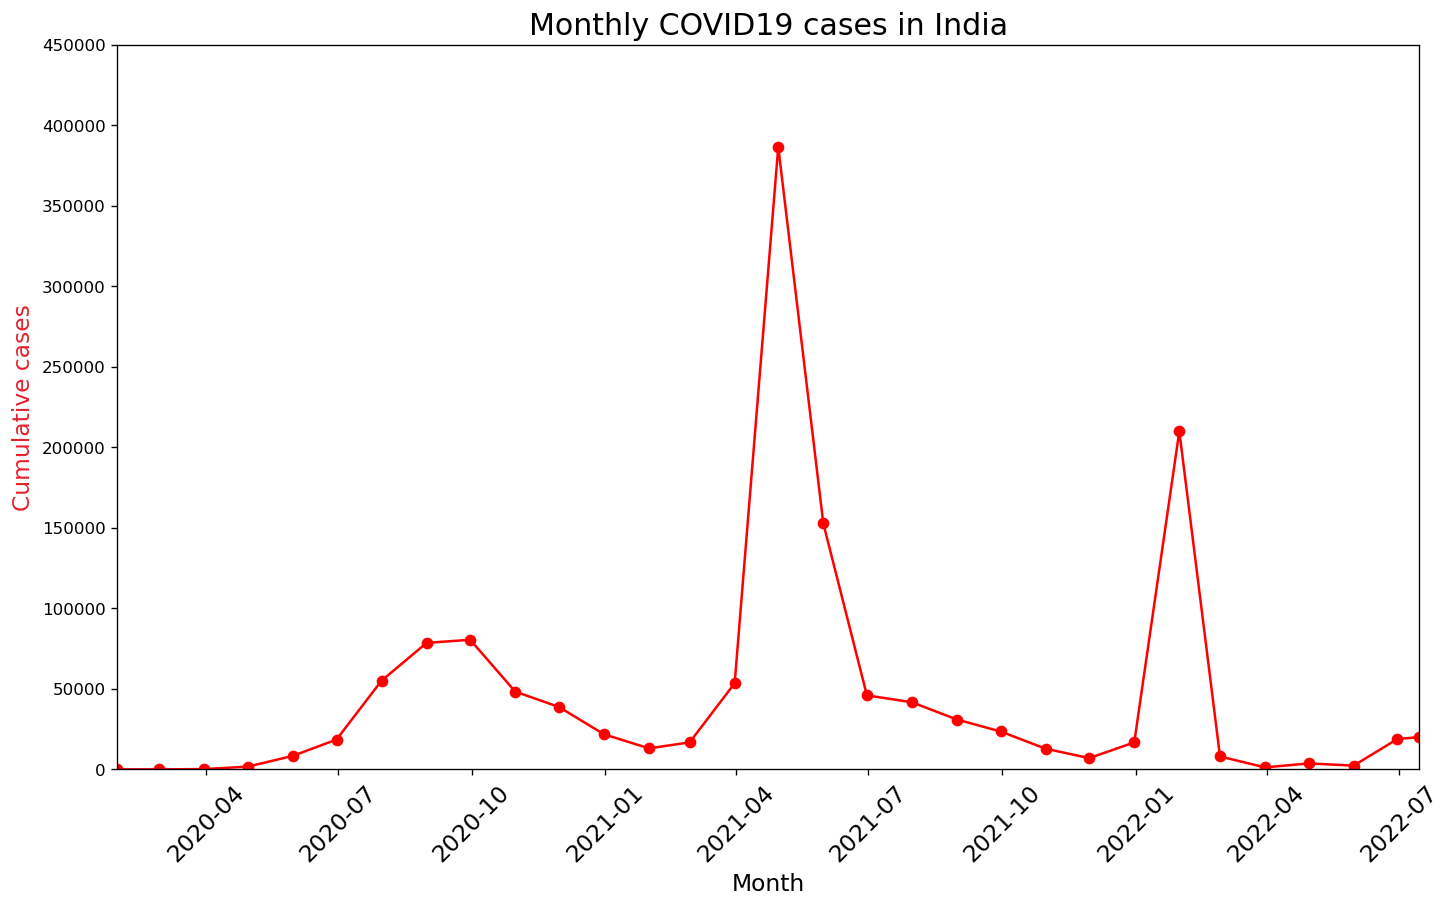

In [9]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly COVID19 cases in India', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45) 
 
plt.ylabel('Cumulative cases', color='#E6232E', fontsize=14)
plt.xlabel('Month', fontsize=14)
 
# Set the minimum and maximum values on the axes
plt.ylim([0, 450000])
plt.xlim([df_covid19_ind_monthly.Date_reported.min(), df_covid19_ind_monthly.Date_reported.max()])
 
plt.plot(df_covid19_ind_monthly.Date_reported,df_covid19_ind_monthly.New_cases, marker='o', color='red')

plt.show()

# Section 2:

# Importing data on India GDP

In [10]:
df_ind_gdp=pd.read_csv('ind_gdp_fred_data.csv')
df_ind_gdp.head()

,DATE,INDLORSGPNOSTSAM
0,2020-01-01,100.847830
1,2020-02-01,100.740758
2,2020-03-01,98.859076
3,2020-04-01,88.672123
4,2020-05-01,83.538103


## Renaming GDP value column

In [11]:
df_ind_gdp.rename(columns = {'INDLORSGPNOSTSAM':'GDP'}, inplace = True)
df_ind_gdp.head()

,DATE,GDP
0,2020-01-01,100.847830
1,2020-02-01,100.740758
2,2020-03-01,98.859076
3,2020-04-01,88.672123
4,2020-05-01,83.538103


## Checking for NAN values

In [12]:
df_ind_gdp.isna().values.any()

False

In [13]:
df_ind_gdp.dtypes

DATE     object
GDP     float64
dtype: object

In [14]:
df_ind_gdp['DATE']=pd.to_datetime(df_ind_gdp['DATE'])

In [15]:
df_covid19_ind_monthly_cropped = df_covid19_ind_monthly.drop(df_covid19_ind_monthly.index[26:31])

## Plotting COVID19 monthly new cases versus Monthly GDP values

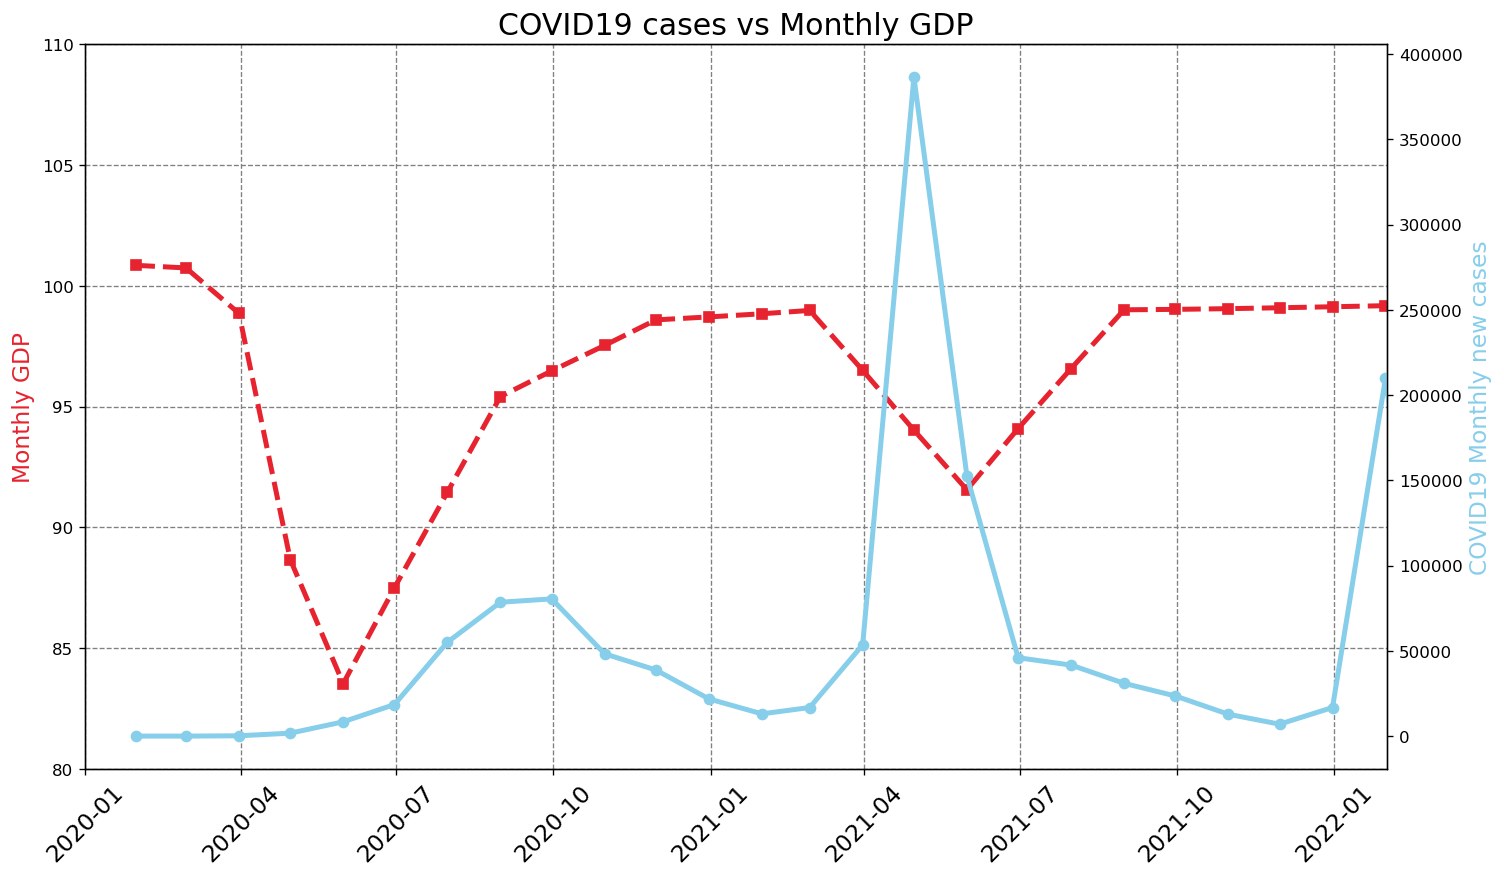

In [16]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('COVID19 cases vs Monthly GDP', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Monthly GDP', color='#E6232E', fontsize=14)
ax2.set_ylabel('COVID19 Monthly new cases', color='skyblue', fontsize=14)

 
# Set the minimum and maximum values on the axes
ax1.set_ylim([80, 110])
ax1.set_xlim([df_ind_gdp.DATE.min(), df_ind_gdp.DATE.max()])
 
ax1.plot(df_covid19_ind_monthly_cropped.Date_reported, df_ind_gdp.GDP, color='#E6232E', linewidth=3, linestyle='dashed', marker= 's')
ax2.plot(df_covid19_ind_monthly_cropped.Date_reported, df_covid19_ind_monthly_cropped.New_cases, color='skyblue', linewidth=3, marker= 'o')

ax1.grid(color='grey', linestyle='--')

plt.show()

### As is evident from the chart, in the year 2020 when COVID 19 cases started rising, India GDP was contracting. This suggests that the rising cases was clearly impacting the output and suggesting towards slowing economy.

### Also in the year 2021, the sharp spike in COVID 19 cases took the GDP down but this time the impact was not as severe as in the year 2020. One reason might be the India's preparedness for the disease and businesses had adjusted to changed scenario due to COVID19

# Section 3:

## Importing data on Central bank interest rates

In [17]:
df_int_ind=pd.read_csv('ind_int_rate_fred_data.csv')
df_int_ind.head()

,DATE,INTDSRINM193N
0,2020-01-01,5.40
1,2020-02-01,5.40
2,2020-03-01,4.65
3,2020-04-01,4.65
4,2020-05-01,4.25


## Renaming CPI value column

In [18]:
df_int_ind.rename(columns = {'INTDSRINM193N':'InterestRate'}, inplace = True)
df_int_ind.head()

,DATE,InterestRate
0,2020-01-01,5.40
1,2020-02-01,5.40
2,2020-03-01,4.65
3,2020-04-01,4.65
4,2020-05-01,4.25


## Checking for NAN values

In [19]:
df_int_ind.isna().values.any()

False

In [20]:
df_covid19_ind_monthly_croppedforINT = df_covid19_ind_monthly.drop(df_covid19_ind_monthly.index[29:31])

## Converting date format from 'object' to 'datetime'

In [21]:
df_int_ind['DATE']=pd.to_datetime(df_int_ind['DATE'])
df_int_ind.dtypes

DATE            datetime64[ns]
InterestRate           float64
dtype: object

## Plotting COVID19 monthly new cases versus Monthly Interest Rate values

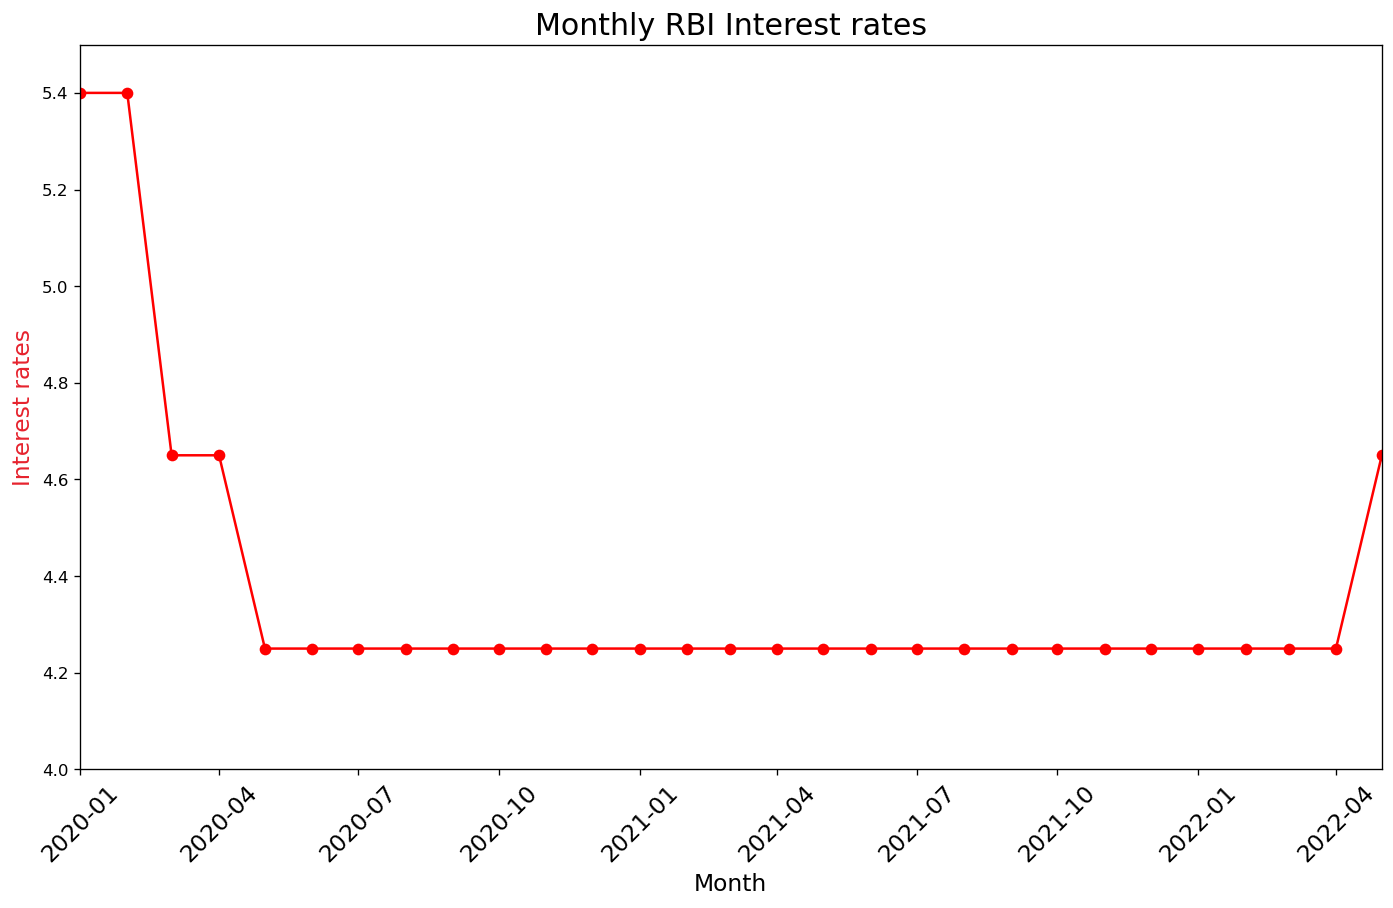

In [22]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly RBI Interest rates', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45) 
 
plt.ylabel('Interest rates', color='#E6232E', fontsize=14)
plt.xlabel('Month', fontsize=14)
 
# Set the minimum and maximum values on the axes
plt.ylim([4, 5.5])
plt.xlim([df_int_ind.DATE.min(), df_int_ind.DATE.max()])
 
plt.plot(df_int_ind.DATE,df_int_ind.InterestRate, marker='o', color='red')

plt.show()

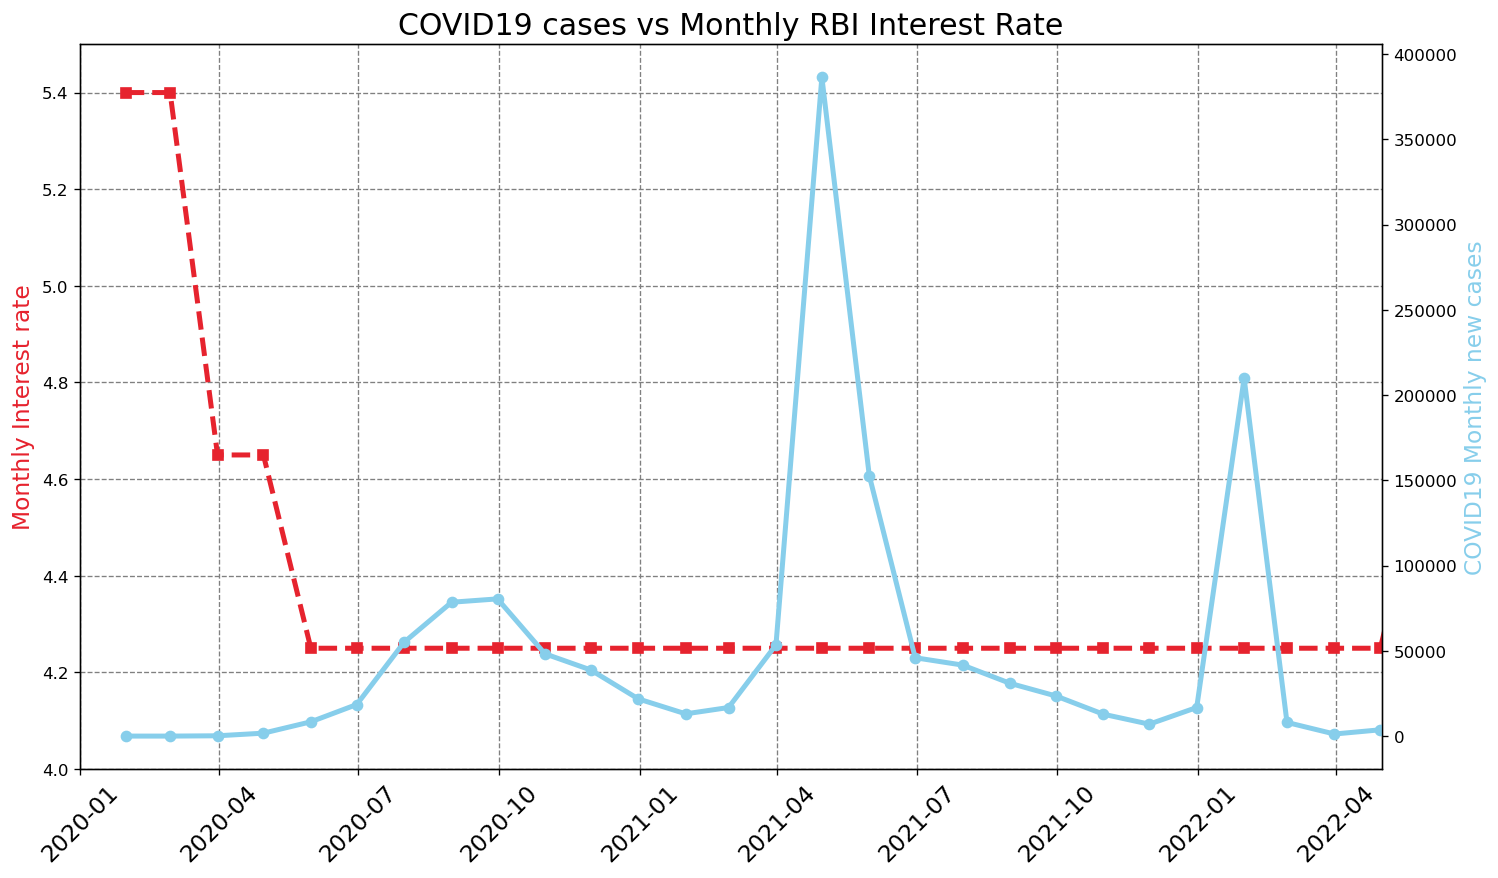

In [23]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('COVID19 cases vs Monthly RBI Interest Rate', fontsize=18)

 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Monthly Interest rate', color='#E6232E', fontsize=14)
ax2.set_ylabel('COVID19 Monthly new cases', color='skyblue', fontsize=14)

 
# Set the minimum and maximum values on the axes
ax1.set_ylim([4,5.5])
ax1.set_xlim([df_int_ind.DATE.min(), df_int_ind.DATE.max()])
 
ax1.plot(df_covid19_ind_monthly_croppedforINT.Date_reported, df_int_ind.InterestRate, color='#E6232E', linewidth=3, linestyle='dashed', marker= 's')
ax2.plot(df_covid19_ind_monthly_croppedforINT.Date_reported, df_covid19_ind_monthly_croppedforINT.New_cases, color='skyblue', linewidth=3, marker= 'o')

ax1.grid(color='grey', linestyle='--')

plt.show()

### To curb the adverse effects of Covid19 spread on economy, India had reduced the repo rates to help businesses and overall economy to stand on its feet. This can be observed in the chart above as the spread of Covid19 increased, the RBI reduced the interest rate quickly as a remedy.

# Section 4:

# Importing data on India Inflation Data

In [24]:
df_cpi_ind= pd.read_csv('ind_cpi_fred_data.csv')
df_cpi_ind.tail()

,DATE,INDCPIALLMINMEI
24,2022-01-01,137.830179
25,2022-02-01,137.720003
26,2022-03-01,138.821763
27,2022-04-01,140.694755
28,2022-05-01,142.127043


## Renaming CPI value column

In [25]:
df_cpi_ind.rename(columns = {'INDCPIALLMINMEI':'CPI'}, inplace = True)

In [26]:
df_cpi_ind.tail()

,DATE,CPI
24,2022-01-01,137.830179
25,2022-02-01,137.720003
26,2022-03-01,138.821763
27,2022-04-01,140.694755
28,2022-05-01,142.127043


## Checking for NAN values 

In [27]:
df_cpi_ind.isna().values.any()

False

## Converting date column into datetime object

In [28]:
df_cpi_ind.DATE = pd.to_datetime(df_cpi_ind.DATE)

## Cropping covid19 data with respect to CPI data

In [29]:
df_covid19_ind_monthly_croppedforCPI = df_covid19_ind_monthly.drop(df_covid19_ind_monthly.index[29:31])

## Plotting COVID19 monthly new cases versus Monthly CPI values

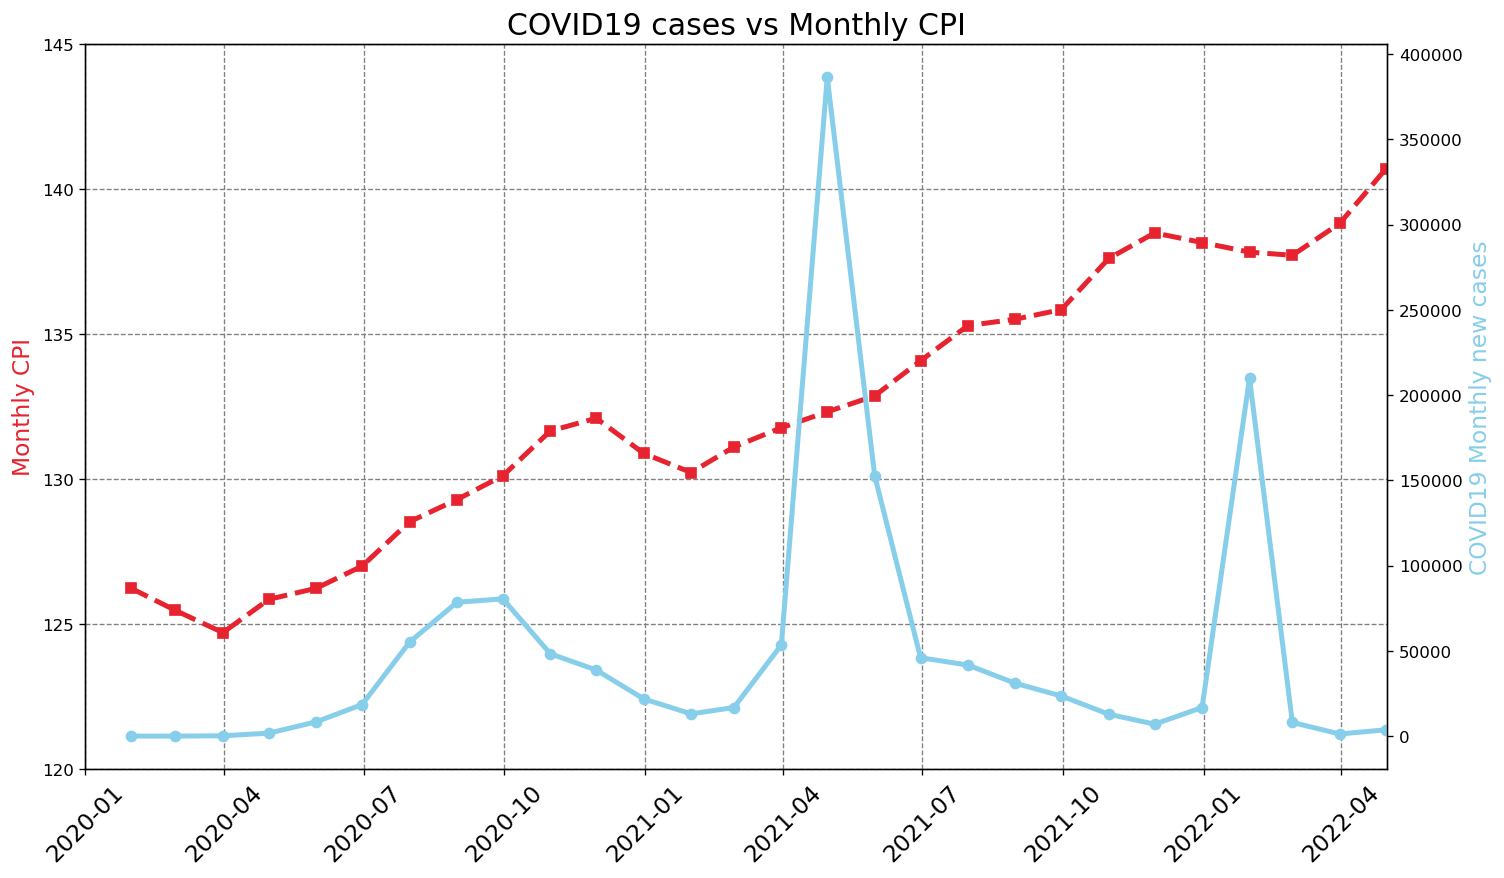

In [30]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('COVID19 cases vs Monthly CPI', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Monthly CPI', color='#E6232E', fontsize=14)
ax2.set_ylabel('COVID19 Monthly new cases', color='skyblue', fontsize=14)

 
# Set the minimum and maximum values on the axes
ax1.set_ylim([120, 145])
ax1.set_xlim([df_cpi_ind.DATE.min(), df_cpi_ind.DATE.max()])
 
ax1.plot(df_covid19_ind_monthly_croppedforCPI.Date_reported, df_cpi_ind.CPI, color='#E6232E', linewidth=3, linestyle='dashed', marker= 's')
ax2.plot(df_covid19_ind_monthly_croppedforCPI.Date_reported, df_covid19_ind_monthly_croppedforCPI.New_cases, color='skyblue', linewidth=3, marker= 'o')

ax1.grid(color='grey', linestyle='--')

plt.show()

### Effect of reduction in interest rate and Inflation:

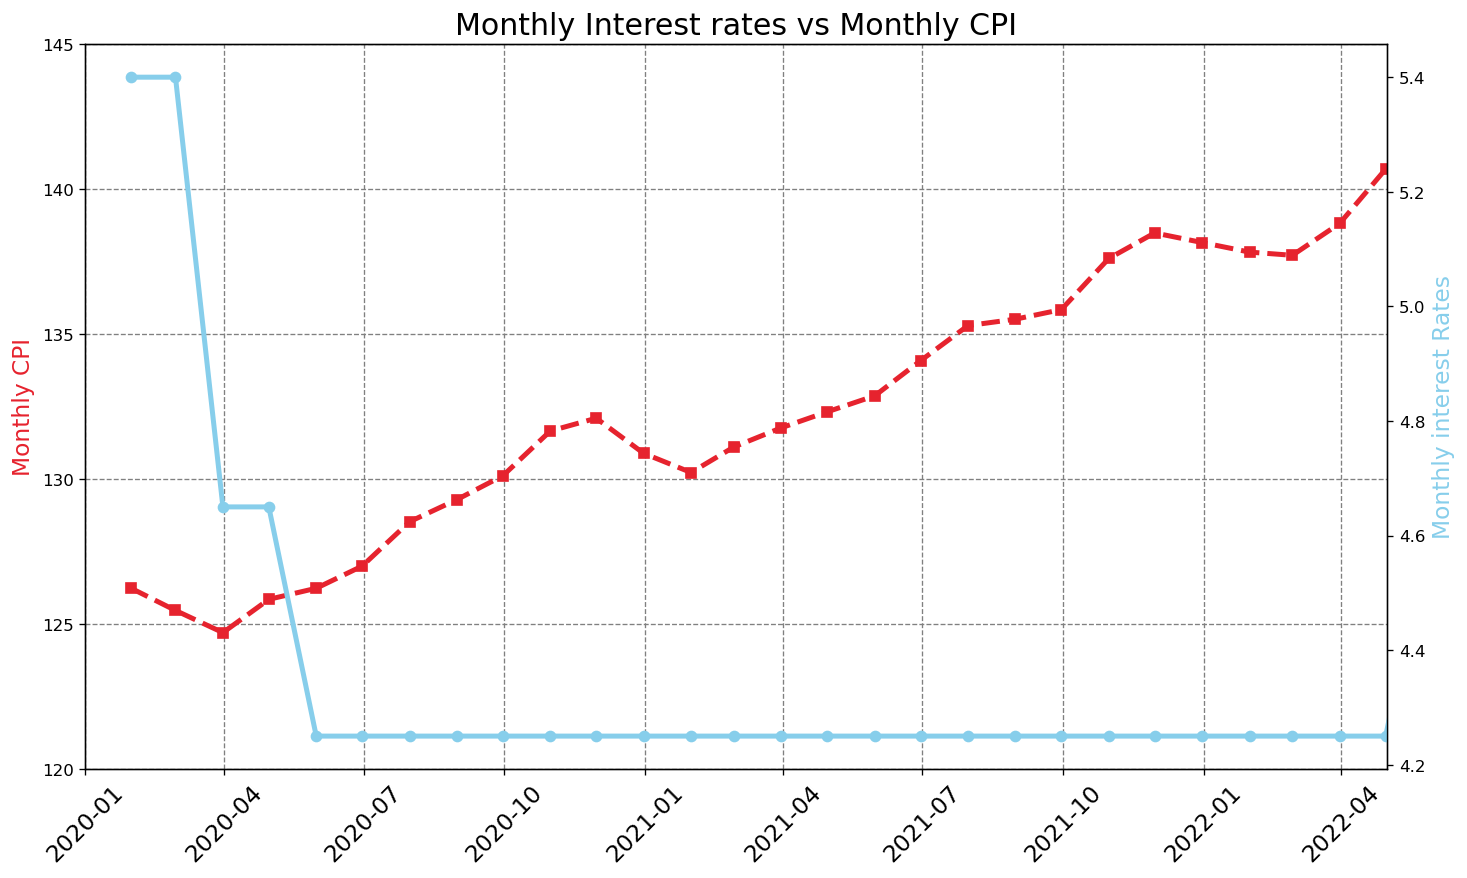

In [31]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Monthly Interest rates vs Monthly CPI', fontsize=18)
 
# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.set_ylabel('Monthly CPI', color='#E6232E', fontsize=14)
ax2.set_ylabel('Monthly interest Rates', color='skyblue', fontsize=14)

 
# Set the minimum and maximum values on the axes
ax1.set_ylim([120, 145])
ax1.set_xlim([df_cpi_ind.DATE.min(), df_cpi_ind.DATE.max()])
 
ax1.plot(df_covid19_ind_monthly_croppedforCPI.Date_reported, df_cpi_ind.CPI, color='#E6232E', linewidth=3, linestyle='dashed', marker= 's')
ax2.plot(df_covid19_ind_monthly_croppedforCPI.Date_reported, df_int_ind.InterestRate, color='skyblue', linewidth=3, marker= 'o')

ax1.grid(color='grey', linestyle='--')

plt.show()

### In the chart above, the aftermath effects of Reduction in interest rate and Increase in inflation can be seen. Even if it is an oversimplification of this data, but it can be generally concluded that easy money flow in the system because of reduction in interest rate has led to increase in demand and in turn lead to inflation.

# Section 5:

## Statewise statistics on Covid19 spread:

### Importing data on statewise Covid19 data

In [32]:
df_statewise_covid19 = pd.read_csv('covid_19_india_statewisecases.csv')

In [33]:
df_statewise_covid19.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [34]:
df_statewise_total = df_statewise_covid19.groupby('State/UnionTerritory').sum()

In [35]:
df_statewise_total.Confirmed.nlargest(4)

State/UnionTerritory
Maharashtra    1121491467
Karnataka       485970693
Kerala          458906023
Tamil Nadu      431928644
Name: Confirmed, dtype: int64

In [36]:
df_statewise_covid19.pivot(index= 'Date',columns= 'State/UnionTerritory', values = 'Confirmed')

State/UnionTerritory,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Bihar****,Cases being reassigned to states,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,...,Rajasthan,Sikkim,Tamil Nadu,Telangana,Telengana,Tripura,Unassigned,Uttar Pradesh,Uttarakhand,West Bengal
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-07,7541.0,1978350.0,49668.0,572546.0,725122.0,NaN,NaN,61970.0,1002958.0,NaN,...,953793.0,27652.0,2571383.0,648388.0,NaN,79948.0,NaN,1708689.0,342336.0,1532379.0
2021-08-08,7544.0,1980258.0,49916.0,573532.0,725158.0,NaN,NaN,61974.0,1003078.0,NaN,...,953812.0,27746.0,2573352.0,648957.0,NaN,80134.0,NaN,1708716.0,342374.0,1533128.0
2021-08-09,7546.0,1982308.0,50070.0,574100.0,725192.0,NaN,NaN,61978.0,1003154.0,NaN,...,953827.0,27860.0,2575308.0,649406.0,NaN,80211.0,NaN,1708772.0,342392.0,1533803.0


In [53]:
fig = px.pie(df_statewise_total, values='Confirmed', names=df_statewise_total.index, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()

### From the chart above, it is evident that the most affected state from Covid19 in India was Maharashtra.

In [57]:
fig = px.pie(df_statewise_total, values='Confirmed', names=df_statewise_total.index)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show()